In [1]:
import numpy as np
import cv2
import os

# Define the directory containing the images
image_dir = r'C:\Users\shris\Downloads\sem6\ds203\project\E7-images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Function to calculate area, perimeter, compactness, elongation, extent, and tight-fitting bounding box using pixel-based method
def calculate_area_perimeter_compactness_bbox_elongation_extent_corners(image, target_color):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a mask of pixels matching the target color
    mask = np.all(image == target_color, axis=2)
    
    # Find contours from the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize area, perimeter, and bounding box parameters
    area = 0
    perimeter = 0
    bbox_areas = []
    
    # Iterate through contours
    for contour in contours:
        area += cv2.contourArea(contour)
        perimeter += cv2.arcLength(contour, True)
        
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)
        bbox_areas.append(w * h)  # Calculate area of bounding box
    
    # Calculate compactness
    compactness = (perimeter ** 2) / area
    
    # Get tight-fitting bounding box parameters
    if bbox_areas:
        max_bbox_area_index = bbox_areas.index(max(bbox_areas))
        x, y, w, h = cv2.boundingRect(contours[max_bbox_area_index])
        bbox_area = bbox_areas[max_bbox_area_index]
    else:
        x, y, w, h = 0, 0, 0, 0
        bbox_area = 0
    
    # Calculate elongation
    if w > h:
        elongation = w / h
    else:
        elongation = h / w
    
    # Calculate extent
    extent = area / bbox_area if bbox_area != 0 else 0
    
    # Detect corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.02, 5)
    corners_count = corners.shape[0] if corners is not None else 0

    return int(area), int(perimeter), round(compactness, 2), (x, y, w, h), bbox_area, round(elongation, 2), round(extent, 2), corners_count

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate area, perimeter, compactness, bounding box, elongation, extent, and corners count
    area_count, perimeter_count, compactness, bbox_params, bbox_area, elongation, extent, corners_count = calculate_area_perimeter_compactness_bbox_elongation_extent_corners(img, target_color)
    
    # Unpack bounding box parameters
    x, y, w, h = bbox_params

    # Print the results
    print(f"Image: {image_file}")
    print(f"Area: {area_count}")
    print(f"Perimeter: {perimeter_count}")
    print(f"Compactness: {compactness}")
    print(f"Tight-fitting bounding box:")
    print(f"  - Width: {w}")
    print(f"  - Height: {h}")
    print(f"  - Area: {bbox_area}")
    print(f"Elongation: {elongation}")
    print(f"Extent: {extent}")
    print(f"Number of corners: {corners_count}")
    print()



Image: 0001.jpg
Area: 124629
Perimeter: 2921
Compactness: 68.5
Tight-fitting bounding box:
  - Width: 444
  - Height: 330
  - Area: 146520
Elongation: 1.35
Extent: 0.85
Number of corners: 6

Image: 0002.jpg
Area: 118531
Perimeter: 3162
Compactness: 84.39
Tight-fitting bounding box:
  - Width: 440
  - Height: 326
  - Area: 143440
Elongation: 1.35
Extent: 0.83
Number of corners: 4

Image: 0003.jpg
Area: 95575
Perimeter: 2648
Compactness: 73.38
Tight-fitting bounding box:
  - Width: 440
  - Height: 324
  - Area: 142560
Elongation: 1.36
Extent: 0.67
Number of corners: 13

Image: 0004.jpg
Area: 89806
Perimeter: 2636
Compactness: 77.38
Tight-fitting bounding box:
  - Width: 435
  - Height: 328
  - Area: 142680
Elongation: 1.33
Extent: 0.63
Number of corners: 13

Image: 0005.jpg
Area: 135804
Perimeter: 3472
Compactness: 88.77
Tight-fitting bounding box:
  - Width: 446
  - Height: 329
  - Area: 146734
Elongation: 1.36
Extent: 0.93
Number of corners: 5

Image: 0006.jpg
Area: 120479
Perimeter: 3

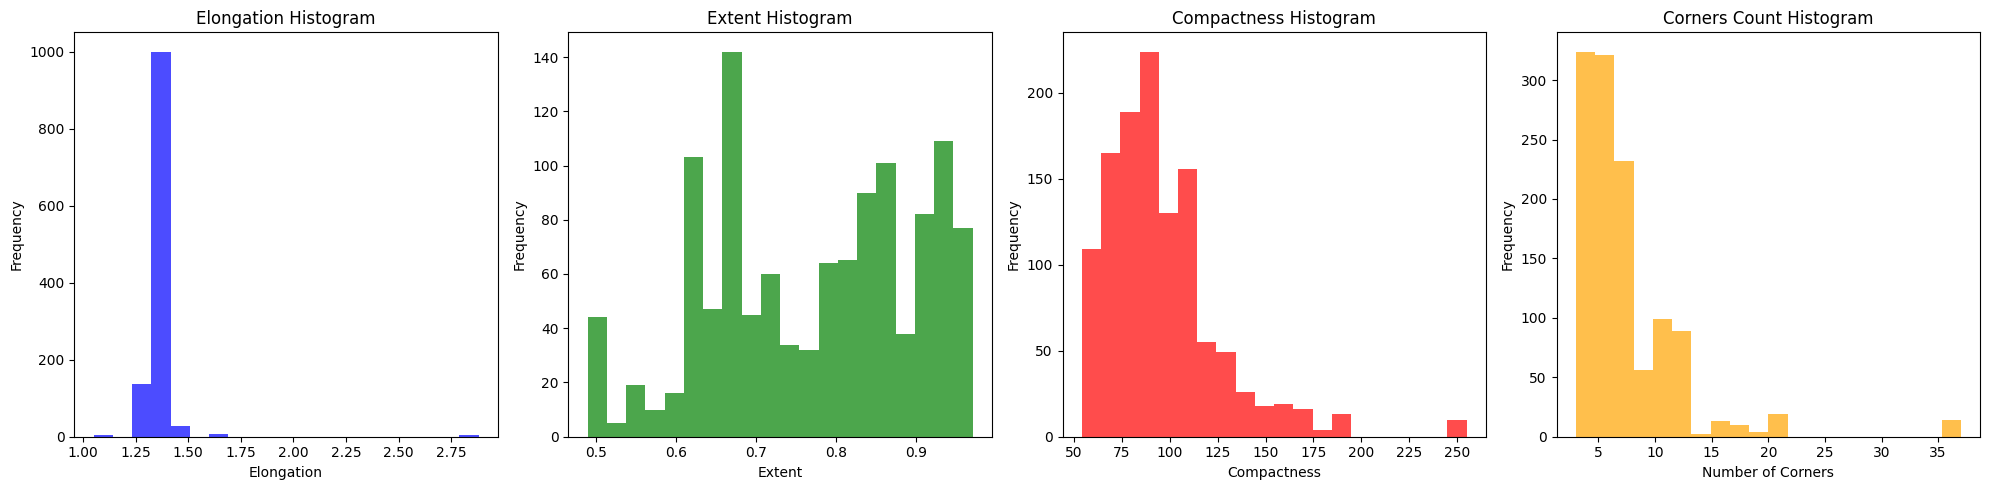

In [5]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Define the directory containing the images
image_dir = r'C:\Users\shris\Downloads\sem6\ds203\project\E7-images'

# List all files in the directory
image_files = os.listdir(image_dir)

# Initialize lists to store values
elongation_values = []
extent_values = []
compactness_values = []
corners_count_values = []

# Loop through each image file
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    # Check if image is loaded properly
    if img is None:
        print(f"Error: Unable to load image {image_file}. Skipping...")
        continue

    # Define the color you want to calculate the area and perimeter for
    target_color = np.array([64, 186, 255])

    # Calculate area, perimeter, compactness, bounding box, elongation, extent, corners count, and solidity
    area_count, perimeter_count, compactness, bbox_params, bbox_area, elongation, extent, corners_count = calculate_area_perimeter_compactness_bbox_elongation_extent_corners(img, target_color)

    # Append values to the lists
    elongation_values.append(elongation)
    extent_values.append(extent)
    compactness_values.append(compactness)
    corners_count_values.append(corners_count)

# Plot histograms
plt.figure(figsize=(20, 5))  # Increase the width for a single row

plt.subplot(1, 4, 1)  # Single row, 4 columns, first subplot
plt.hist(elongation_values, bins=20, color='blue', alpha=0.7)
plt.title('Elongation Histogram')
plt.xlabel('Elongation')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)  # Single row, 4 columns, second subplot
plt.hist(extent_values, bins=20, color='green', alpha=0.7)
plt.title('Extent Histogram')
plt.xlabel('Extent')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)  # Single row, 4 columns, third subplot
plt.hist(compactness_values, bins=20, color='red', alpha=0.7)
plt.title('Compactness Histogram')
plt.xlabel('Compactness')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)  # Single row, 4 columns, fourth subplot
plt.hist(corners_count_values, bins=20, color='orange', alpha=0.7)
plt.title('Corners Count Histogram')
plt.xlabel('Number of Corners')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Number of images in low complexity: 790
Number of images in medium complexity: 318
Number of images in high complexity: 75


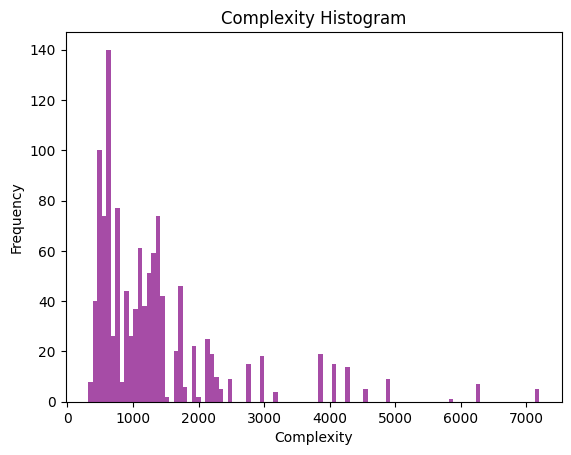

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming elongation_values, extent_values, compactness_values, corners_count_values are defined

elongation = np.array(elongation_values)
extent = np.array(extent_values)
compactness = np.array(compactness_values)
corners_count = np.array(corners_count_values)

complexity = elongation * corners_count * compactness / extent

# Categorize images into low, medium, and high complexity
arr_low = complexity[complexity <= 1350]
arr_medium = complexity[(complexity > 1350) & (complexity < 3374)]
arr_high = complexity[complexity >= 3374]

# Print the number of images in each category
print("Number of images in low complexity:", len(arr_low))
print("Number of images in medium complexity:", len(arr_medium))
print("Number of images in high complexity:", len(arr_high))

# Plot histogram
plt.hist(complexity, bins=100, color='purple', alpha=0.7)
plt.title('Complexity Histogram')
plt.xlabel('Complexity')
plt.ylabel('Frequency')
plt.show()


Complexity of img 1 : 652.76
Complexity of img 2 : 549.04
Complexity of img 3 : 1936.36
Complexity of img 4 : 2123.65
Complexity of img 5 : 649.07
Complexity of img 6 : 962.29
Complexity of img 7 : 1428.22
Complexity of img 8 : 2471.55
Complexity of img 9 : 1172.22
Complexity of img 10 : 1056.29
Complexity of img 11 : 625.22
Complexity of img 12 : 572.65
Complexity of img 13 : 1084.6
Complexity of img 14 : 697.46
Complexity of img 15 : 4883.05
Complexity of img 16 : 1230.25
Complexity of img 17 : 736.15
Complexity of img 18 : 649.07
Complexity of img 19 : 659.12
Complexity of img 20 : 2978.49
Complexity of img 21 : 1323.34
Complexity of img 22 : 1449.48
Complexity of img 23 : 1379.76
Complexity of img 24 : 1375.95
Complexity of img 25 : 1339.35
Complexity of img 26 : 774.21
Complexity of img 27 : 1449.48
Complexity of img 28 : 1703.45
Complexity of img 29 : 1343.51
Complexity of img 30 : 961.05
Complexity of img 31 : 1740.98
Complexity of img 32 : 891.74
Complexity of img 33 : 600.97
C

Text(0, 0.5, 'Frequency')

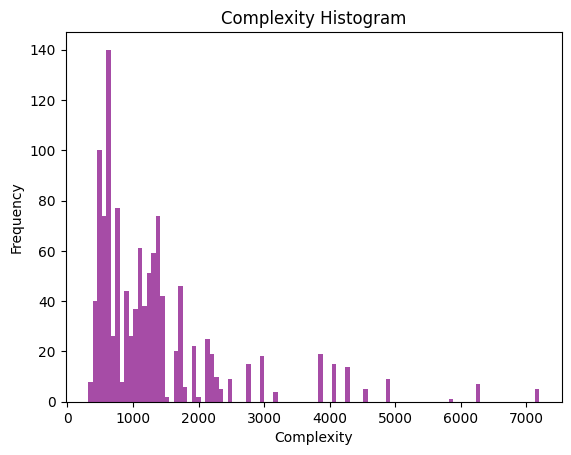

In [44]:
import numpy as np
elongation = np.array(elongation_values)
extent = np.array(extent_values)
compactness = np.array(compactness_values)
corners_count = np.array(corners_count_values)

complexity = elongation*corners_count*compactness/extent


arr_low = complexity[complexity <= 1350]
indices_low = np.where(complexity <= 1350)[0]

arr_medium = complexity[(complexity > 1350) & (complexity < 3374)]
indices_medium = np.where((complexity > 1350) & (complexity < 3374))[0]

arr_high = complexity[complexity >= 1350]
indices_high = np.where(complexity >= 1350)[0]

for i in range(len(complexity)):
    print("Complexity of img",i+1, ":", round(complexity[i],2))
        
for i in range(len(complexity)):
    if(complexity[i] < 1350):
        print("Image ",i+1, " is of low complexity")
    elif(complexity[i] > 3374):
        print("Image ", i+1, " is of high complexity")
    else:
        print("Image ", i+1, " is of medium complexity")

plt.hist(complexity, bins=100, color='purple', alpha=0.7)
plt.title('Complexity Histogram')
plt.xlabel('Complexity')
plt.ylabel('Frequency')
